In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pymc as pm

In [12]:
import pandas as pd

# Create the data as lists
treatment = ['Treated'] * 21 + ['Control'] * 23
response = [
    # Treated group
    24, 43, 58, 71, 43, 49, 61, 44, 67, 49, 53, 56, 59, 52, 62, 54, 57, 33, 46, 43, 57,
    # Control group
    42, 43, 55, 26, 62, 37, 33, 41, 19, 54, 20, 85, 46, 10, 17, 60, 53, 42, 37, 42, 55, 28, 48
]

# Create the dataframe
df = pd.DataFrame({
    'Treatment': treatment,
    'Response': response
})

# Optional: if you want to see the first few rows
print(df)

   Treatment  Response
0    Treated        24
1    Treated        43
2    Treated        58
3    Treated        71
4    Treated        43
5    Treated        49
6    Treated        61
7    Treated        44
8    Treated        67
9    Treated        49
10   Treated        53
11   Treated        56
12   Treated        59
13   Treated        52
14   Treated        62
15   Treated        54
16   Treated        57
17   Treated        33
18   Treated        46
19   Treated        43
20   Treated        57
21   Control        42
22   Control        43
23   Control        55
24   Control        26
25   Control        62
26   Control        37
27   Control        33
28   Control        41
29   Control        19
30   Control        54
31   Control        20
32   Control        85
33   Control        46
34   Control        10
35   Control        17
36   Control        60
37   Control        53
38   Control        42
39   Control        37
40   Control        42
41   Control        55
42   Contro

In [19]:
grouped = df.groupby('Treatment')
responses = {}

for name, group in grouped:
    responses[name] = group['Response']


treated = responses['Treated']
control = responses['Control']


In [23]:
treated_mean = treated.mean()
control_mean = control.mean()
print(f'Treated mean: {treated_mean}, Control mean: {control_mean}')

Treated mean: 51.476190476190474, Control mean: 41.52173913043478


In [29]:
print(treated.min(),treated.max(),treated.std())

24 71 11.00735684721381


In [41]:
type(treated)

pandas.core.series.Series

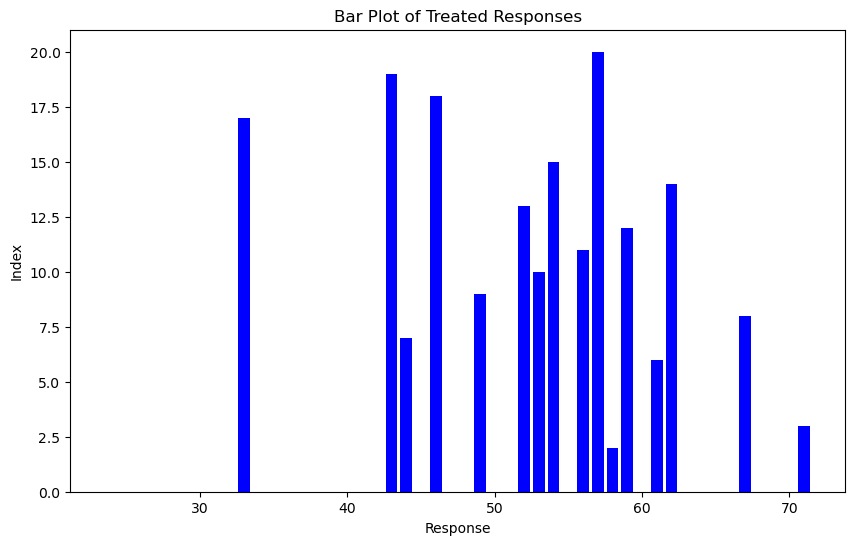

In [38]:
# Assuming 'treated' is a Series
x = treated.values
y = range(len(treated))

plt.figure(figsize=(10, 6))
plt.bar(x, y, color='blue')
plt.xlabel('Response')
plt.ylabel('Index')
plt.title('Bar Plot of Treated Responses')
plt.show()

In [42]:
data = treated.values

options = {
    'random_seed': 123,     # for reproducibility
    'return_inferencedata': True,  # returns data in special format
    'chains': 4,            # number of parallel chains
    'tune': 500            # burn-in period
}


with pm.Model() as model8:
    mu = pm.Uniform('mu', 40, 60)
    sigma = pm.Uniform('sigma', 5, 20)
    y = pm.Normal('y', mu, sigma, observed=data)
    idata8 = pm.sample(500, **options)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma]


Output()

Sampling 4 chains for 500 tune and 500 draw iterations (2_000 + 2_000 draws total) took 22 seconds.


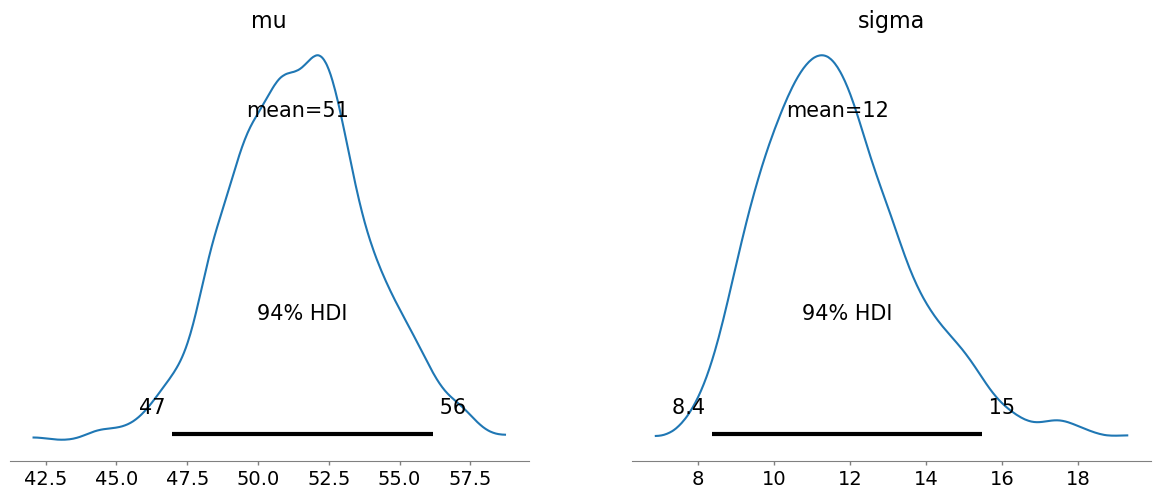

In [43]:
import arviz as az

with model8:
    az.plot_posterior(idata8)